In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
data = pd.read_csv(r"flowershapes.csv")

data_np = data.to_numpy()

In [33]:
n = len(data_np)

median_sepal_length = data_np[25,0]
median_sepal_width = data_np[25,1]
median_petal_length = data_np[25,2] 
median_petal_width = data_np[25,3]

mean_sepal_length = np.round(1/n * np.sum(data_np[:,0]),2)
mean_sepal_width = np.round(1/n * np.sum(data_np[:,1]),2)
mean_petal_length = np.round(1/n * np.sum(data_np[:,2]),2)
mean_petal_width = np.round(1/n * np.sum(data_np[:,3]),2)

var_sepal_length = np.round(1/n*np.sum(data_np[:,0]**2) - mean_sepal_length**2,3)
var_sepal_width = np.round(1/n*np.sum(data_np[:,1]**2) - mean_sepal_width**2,3)
var_petal_length = np.round(1/n*np.sum(data_np[:,2]**2) - mean_petal_length**2,3)
var_petal_width = np.round(1/n*np.sum(data_np[:,3]**2) - mean_petal_width**2,3)

std_sepal_length = np.round(np.sqrt(var_sepal_length),2)
std_sepal_width = np.round(np.sqrt(var_sepal_width),2)
std_petal_length = np.round(np.sqrt(var_petal_length),2)
std_petal_width = np.round(np.sqrt(var_petal_width),2)


print('Median: Sepal length - ', median_sepal_length, ' cm; Sepal width - ', median_sepal_width, ' cm; Petal length - ', median_petal_length, ' cm; Petal width - ', median_petal_width, ' cm')
print('Mean: Sepal length - ', mean_sepal_length, ' cm; Sepal width - ', mean_sepal_width, ' cm; Petal length - ', mean_petal_length, ' cm; Petal width - ', mean_petal_width, ' cm')
print('Variance: Sepal length - ', var_sepal_length, ' cm²; Sepal width - ', var_sepal_width, ' cm²; Petal length - ', var_petal_length, ' cm²; Petal width - ', var_petal_width, ' cm²')
print('Standard deviation: Sepal length - ', std_sepal_length, ' cm; Sepal width - ', std_sepal_width, ' cm; Petal length - ', std_petal_length, ' cm; Petal width - ', std_petal_width, ' cm')


Median: Sepal length -  5.0  cm; Sepal width -  3.4  cm; Petal length -  1.6  cm; Petal width -  0.4  cm
Mean: Sepal length -  5.0  cm; Sepal width -  3.42  cm; Petal length -  1.47  cm; Petal width -  0.24  cm
Variance: Sepal length -  0.165  cm²; Sepal width -  0.12  cm²; Petal length -  0.016  cm²; Petal width -  0.014  cm²
Standard deviation: Sepal length -  0.41  cm; Sepal width -  0.35  cm; Petal length -  0.13  cm; Petal width -  0.12  cm


The medians, variances and standard deviations differ more from the values calculated for the smaller sample size. The arithmetic means are similar for both sample sizes.

In [34]:
cov_ab = 1/n*np.sum((data_np[:,0] - mean_sepal_length)*(data_np[:,1] - mean_sepal_width))
cov_ac = 1/n*np.sum((data_np[:,0] - mean_sepal_length)*(data_np[:,2] - mean_petal_length))
cov_ad = 1/n*np.sum((data_np[:,0] - mean_sepal_length)*(data_np[:,3] - mean_petal_width))
cov_bc = 1/n*np.sum((data_np[:,1] - mean_sepal_width)*(data_np[:,2] - mean_petal_length))
cov_bd = 1/n*np.sum((data_np[:,1] - mean_sepal_width)*(data_np[:,3] - mean_petal_width))
cov_cd = 1/n*np.sum((data_np[:,2] - mean_petal_length)*(data_np[:,3] - mean_petal_width))

cov_matrix = np.array([np.array([var_sepal_length, cov_ab, cov_ac, cov_ad]), np.array([cov_ab, var_sepal_width, cov_bc, cov_bd]), np.array([cov_ac, cov_bc, var_petal_length, cov_cd]), np.array([cov_ad, cov_bd, cov_cd, var_petal_width])])
print(cov_matrix)

V_xy = np.array([np.array([var_sepal_length**2, var_sepal_length*var_sepal_width, var_sepal_length*var_petal_length, var_sepal_length*var_petal_width]),
                np.array([var_sepal_length*var_sepal_width, var_sepal_width*var_sepal_width, var_sepal_width*var_petal_length, var_sepal_width*var_petal_width]), 
                np.array([var_petal_length*var_sepal_length, var_petal_length*var_sepal_width, var_petal_length*var_petal_length, var_petal_length*var_petal_width]),
                np.array([var_petal_width*var_sepal_length, var_petal_width*var_sepal_width, var_petal_width*var_petal_length, var_petal_width*var_petal_width])])

corr_matrix = cov_matrix/np.sqrt(V_xy)
print(corr_matrix)

[[0.165      0.10012245 0.0162449  0.01065306]
 [0.10012245 0.12       0.01180816 0.01149388]
 [0.0162449  0.01180816 0.016      0.00561633]
 [0.01065306 0.01149388 0.00561633 0.014     ]]
[[1.         0.71153926 0.3161659  0.22165036]
 [0.71153926 1.         0.26948322 0.2804219 ]
 [0.3161659  0.26948322 1.         0.3752566 ]
 [0.22165036 0.2804219  0.3752566  1.        ]]


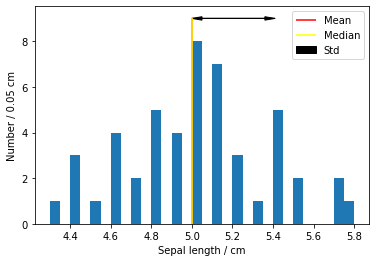

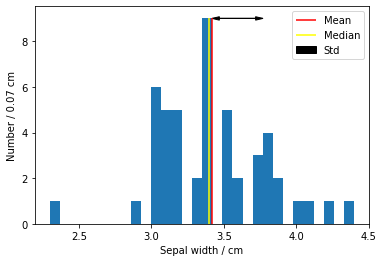

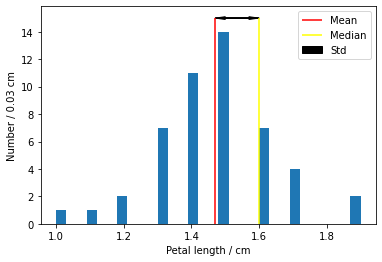

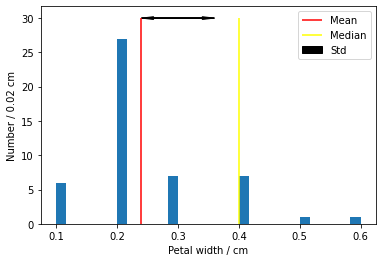

In [35]:
plt.figure(1)
n, bins, patches = plt.hist(data_np[:,0], bins = 30)
plt.xlabel('Sepal length / cm')
plt.ylabel('Number / ' + str(np.round(bins[1]-bins[0], 2)) + ' cm')
plt.vlines(mean_sepal_length, 0, 9, label = 'Mean', color = 'red')
plt.vlines(median_sepal_length, 0, 9, label = 'Median', color = 'yellow')
plt.arrow(mean_sepal_length, 9, std_sepal_length, 0, length_includes_head=True,
          head_width=0.15, head_length=0.05, color = 'black', label = 'Std', shape = 'full')
plt.arrow(mean_sepal_length+std_sepal_length, 9, -std_sepal_length, 0, length_includes_head=True,
          head_width=0.15, head_length=0.05, color = 'black', shape = 'full')
plt.legend()

plt.figure(2)
n, bins, patches = plt.hist(data_np[:,1], bins = 30)
plt.xlabel('Sepal width / cm')
plt.ylabel('Number / ' + str(np.round(bins[1]-bins[0], 2)) + ' cm')
plt.vlines(mean_sepal_width, 0, 9, label = 'Mean', color = 'red')
plt.vlines(median_sepal_width, 0, 9, label = 'Median', color = 'yellow')
plt.arrow(mean_sepal_width, 9, std_sepal_width, 0, length_includes_head=True,
          head_width=0.15, head_length=0.05, color = 'black', label = 'Std', shape = 'full')
plt.arrow(mean_sepal_width+std_sepal_width, 9, -std_sepal_width, 0, length_includes_head=True,
          head_width=0.15, head_length=0.05, color = 'black', shape = 'full')
plt.legend()

plt.figure(3)
n, bins, patches = plt.hist(data_np[:,2], bins = 30)
plt.xlabel('Petal length / cm')
plt.ylabel('Number / ' + str(np.round(bins[1]-bins[0], 2)) + ' cm')
plt.vlines(mean_petal_length, 0, 15, label = 'Mean', color = 'red')
plt.vlines(median_petal_length, 0, 15, label = 'Median', color = 'yellow')
plt.arrow(mean_petal_length, 15, std_petal_length, 0, length_includes_head=True,
          head_width=0.2, head_length=0.03, color = 'black', label = 'Std', shape = 'full')
plt.arrow(mean_petal_length+std_petal_length, 15, -std_petal_length, 0, length_includes_head=True,
          head_width=0.2, head_length=0.03, color = 'black', shape = 'full')
plt.legend()

plt.figure(4)
n, bins, patches = plt.hist(data_np[:,3], bins = 30)
plt.xlabel('Petal width / cm')
plt.ylabel('Number / ' + str(np.round(bins[1]-bins[0], 2)) + ' cm')
plt.vlines(mean_petal_width, 0, 30, label = 'Mean', color = 'red')
plt.vlines(median_petal_width, 0,30, label = 'Median', color = 'yellow')
plt.arrow(mean_petal_width, 30, std_petal_width, 0, length_includes_head=True,
          head_width=0.4, head_length=0.02, color = 'black', label = 'Std', shape = 'full')
plt.arrow(mean_petal_width+std_petal_width, 30, -std_petal_width, 0, length_includes_head=True,
          head_width=0.4, head_length=0.02, color = 'black', shape = 'full')
plt.legend()

plt.show()